# 2.概率分布

In [12]:
# preparation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.rv import (
    Bernoulli,
    Beta,
    Categorical,
    Dirichlet,
    Gamma,
    Gaussian,
    MultivariateGaussian,
    MultivariateGaussianMixture,
    StudentsT,
    Uniform
)

np.random.seed(1234)

本章学习各种特殊的概率分布。作用：在有限观测下，对p(x)进行建模-密度估计.每次取样都是独立同分布的。<p>
我们用离散随机变量的二项分布和多项式分布，连续随机变量的高斯分布的参数估计。
- 频率派计算似然函数之类的确定参数。
- 贝叶斯派引入参数的先验，来计算后验。<p>

还有个重要概念：共轭先验：后验概率和先验概率分布相同。<p>
也会介绍非参数密度估计的方法。

## 2.1 二元变量
x只能取0或1，取1的概率是$\mu$(扔损坏的硬币)

$$ p(x = 1|\mu) = \mu \tag{2.1} $$

$0 \leq \mu \leq 1 $，所以$ p(x=0|\mu) = 1 - \mu $。概率分布为：

$$ Bern(x|\mu) = \mu^x(1-\mu)^{1 - x} \tag{2.2} $$

这就是伯努利分布。

它归一化的，均值和方差也可以计算。

$E[x]=\mu \tag{2.3}$

$var[x]=\mu(1-\mu) \tag{2.4}$

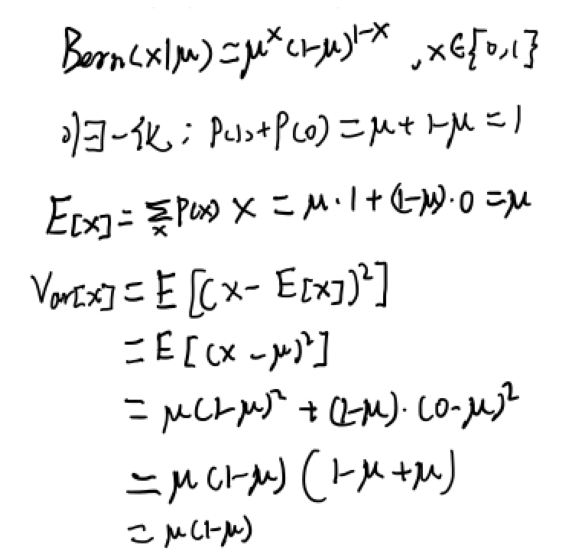

In [5]:
# bern归一化
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1bern归一化.png')
plt.axis('off')
ax.imshow(d)

如果观测值是数据集$D=\{x_1,...,x_N\}$，每次观测都是在$p(x|\mu)$中抽取。则似然函数有：

$$ p(D|\mu) = \prod\limits_{n=1}^Np(x_n|\mu) = \prod\limits_{n=1}^{N}\mu^{x_n}(1-\mu)^{1-x_n} \tag{2.5} $$

频度派：最大化似然函数来估计参数》最大化对数似然。

$$ \ln p(D|\mu) = \sum\limits_{n=1}^N\ln p(x_n|\mu) = \sum\limits_{n=1}^N{x_n\ln \mu + (1 - x_n)\ln(1-\mu)} \tag{2.6} $$

**这个只用N次观测结果得到的似然函数，也叫充分统计量。**令其导数为零，我们有最大似然的估计值时的$\mu$:

$$ \mu_{ML} = \frac{1}{N}\sum\limits_{n=1}^N x_n \tag{2.7} $$

这也叫做样本均值。如果把x=1的观测次数记录为m，则2.7可以写成：

$$ \mu_{ML} = \frac{m}{N} \tag{2.8} $$

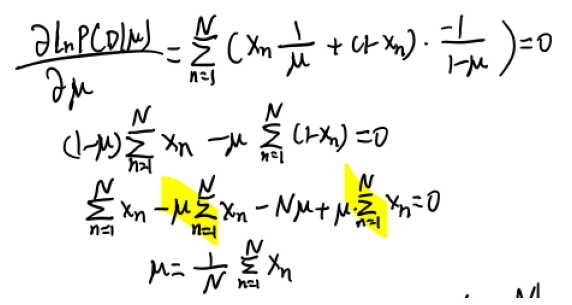

In [9]:
# 最大似然
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1最大似然.png')
plt.axis('off')
ax.imshow(d)

但这个只用观测可能不靠谱，扔硬币三次刚好都是正面N=m=3,则会判断未来观测都是正面。

In [3]:
model = Bernoulli()
model.fit(np.array([0., 1., 1., 1.]))
print(model)

Bernoulli(
    mu=0.75
)


In [4]:
model = Bernoulli()
model.fit(np.array([1., 1., 1., 1.]))
print(model)

Bernoulli(
    mu=1.0
)


一般引入先验来解决。

换一个角度，在给定数据集规模N的条件下，x=1的观测出现数量m的概率分布：二项分布。

概率是正比于$ \mu^m(1 - \mu)^{N - m} $的.就是每次扔硬币的结果叠乘得到的。

而且需要归一化常数：N次抛掷中，m个正面向上的次数的组合$C_N^m$为归一化常数。

$$ Bin(m|N, \mu) = \binom{N}{m}\mu^m(1 - \mu)^{N - m} \tag{2.9} $$

其中 $$ \binom{N}{m} \equiv \frac{N!}{(N - m)!m!} \tag{2.10} $$

$ N = 10, \mu = 0.25 $二项式分布示意图:

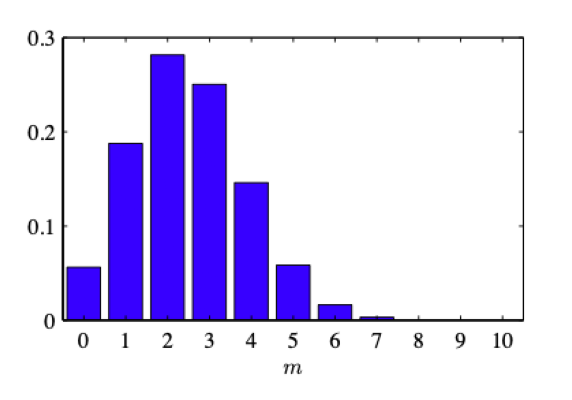

In [7]:
# 二项分布
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1二项分布.png')
plt.axis('off')
ax.imshow(d)

根据1.10:加和的均值是均值的加和，加和的方差是方差的加和:

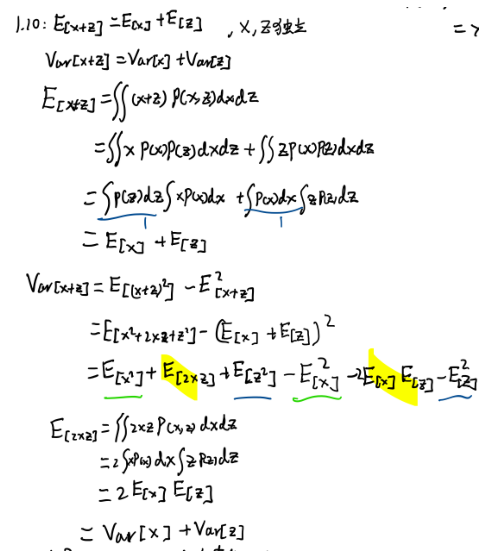

In [8]:
# 1.10
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.11.10.png')
plt.axis('off')
ax.imshow(d)

$m=x_1+...+x_N$，因此我们有:<p>

$$
\mathbb{E}[m] \equiv \sum_{m=0}^{N} m \operatorname{Bin}(m \mid N, \mu)=N \mu \tag{2.11}
$$
    
$$
\mathbb{E}[m] \equiv \sum_{m=0}^{N} (m-E[m])^2 \operatorname{Bin}(m \mid N, \mu)=N \mu(1-\mu) \tag{2.12}
$$

## 2.1.1 Beta分布
直接用最大似然，小数据集会过拟合。引入$\mu$的先验来解决。

似然是一个$ \mu^x(1-\mu)^{1-x} $的乘积形式。我们选择先验也是这样的形式的话，后验也会是这样的形式。这叫做共轭性。所以我们选择先验为Beta分布：

$$ Beta(\mu|a, b) = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1} \tag{2.13} $$

其中 $$ \Gamma(x) \equiv \int_0^\infty u^{x-1}e^{-u}du $$



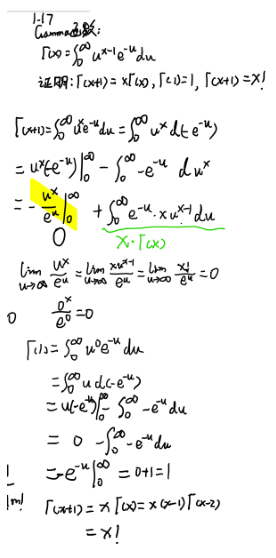

In [19]:
# Gamma函数性质
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1Gamma函数性质.png')
plt.axis('off')
ax.imshow(d)

满足归一化

$$ \int_0^1 Beta(\mu|a,b)d\mu = 1 \tag{2.14} $$


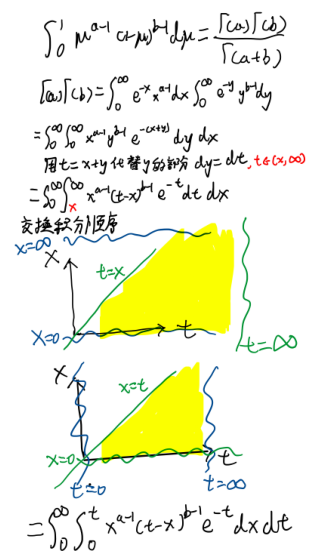

In [24]:
# 归一化证明up
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1归一化证明up.png')
plt.axis('off')
ax.imshow(d)

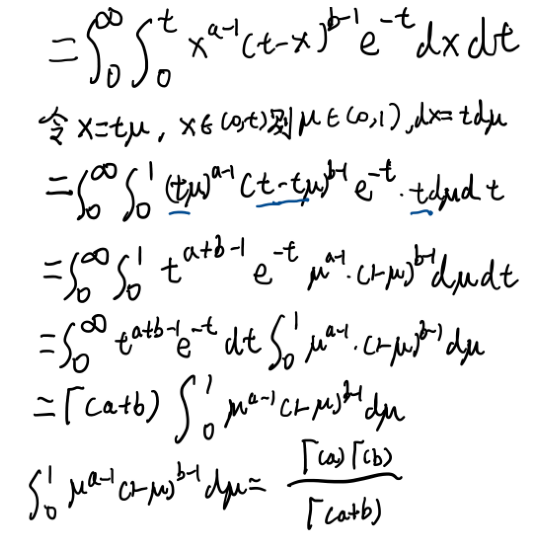

In [25]:
# 归一化证明down
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1归一化证明down.png')
plt.axis('off')
ax.imshow(d)

均值和方差：
$E[\mu]= \frac{a}{a + b} \tag{2.15}$

$\ var[\mu] =\frac{ab}{(a+b)^2(a+b+1)} \tag{2.16}$
这里a和b是超参数。

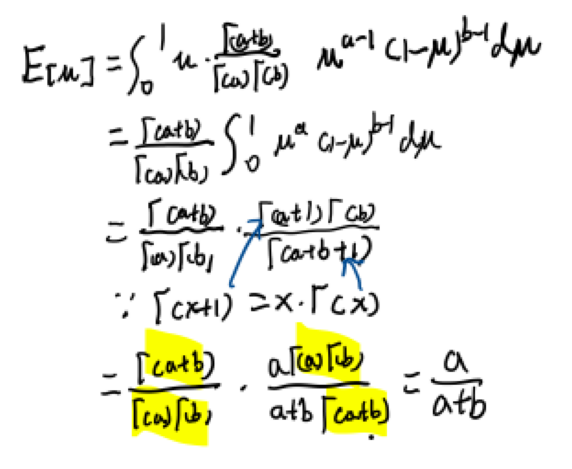

In [21]:
# 均值
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1均值.png')
plt.axis('off')
ax.imshow(d)

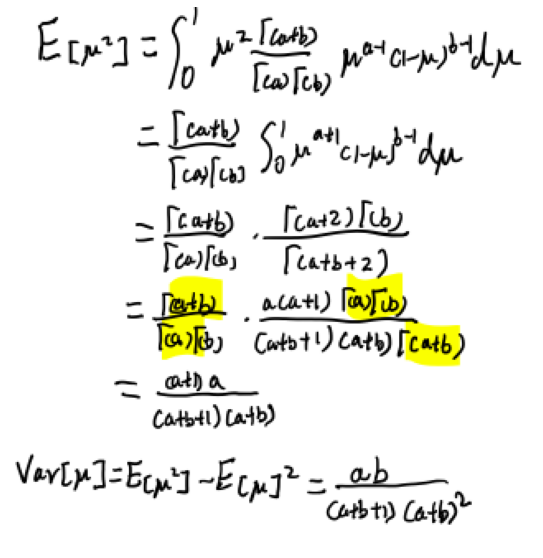

In [22]:
# 方差
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1方差.png')
plt.axis('off')
ax.imshow(d)

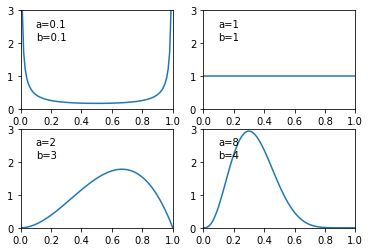

In [17]:
# 不同超参数对应图
x = np.linspace(0, 1, 100)
for i, [a, b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]]):
    plt.subplot(2, 2, i + 1)
    beta = Beta(a, b)
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    plt.plot(x, beta.pdf(x))
    plt.annotate("a={}".format(a), (0.1, 2.5))
    plt.annotate("b={}".format(b), (0.1, 2.1))
plt.show()

Beta先验2.13和二项似然函数2.9相乘，归一化，可得到：

$$ p(\mu|m,l,a,b) \propto \mu^{m+a-1}(1-\mu)^{l+b-1} \tag{2.17} $$

其中l=N-m。和先验分布的形式相同。共轭。对比2.13就可以得到归一化系数。

$$ p(\mu|m,l,a,b) = \frac{\Gamma(m+a+l+b)}{\Gamma(m+a)\Gamma(l+b)}\mu^{m+a-1}(1-\mu)^{l+b-1} \tag{2.18} $$

从先验到后验，a的值增加了m，b的值增加了l。超参数a和b叫有效观测数。再进行新的观测，这里的后验又变成下次观测的先验。

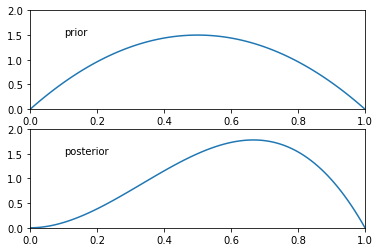

In [18]:
# 贝叶斯顺序推断
beta = Beta(2, 2)
plt.subplot(2, 1, 1)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.plot(x, beta.pdf(x))
plt.annotate("prior", (0.1, 1.5))

model = Bernoulli(mu=beta)
model.fit(np.array([1]))
plt.subplot(2, 1, 2)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.plot(x, model.mu.pdf(x))
plt.annotate("posterior", (0.1, 1.5))

plt.show()

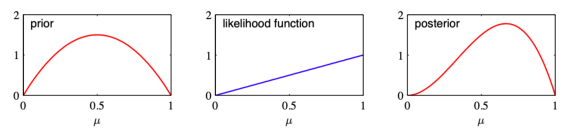

In [26]:
# 贝叶斯顺序推断
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1贝叶斯顺序推断.png')
plt.axis('off')
ax.imshow(d)

先验为Beta分布，a=2,b=2,似然是2.9,其中N=m=1，后验概率是Beta分布，变成a=3,b=2.这样**顺序学习，每次有新数据，用更新过的先验来处理就可以，不需要之前的数据**。

如果我们目标是尽可能好地进行预测下一次数据，那么在给定观测数据D的情况下，x的预测分布就是：

$$ p(x=1|D) = \int_0^1p(x=1|\mu)p(\mu|D)d\mu = \int_0^1\mu p(\mu|D)d\mu = \mathbb{E}[\mu|D] \tag{2.19} $$

根据2.18和2.13的形式对应。和2.15对比，我们可以得到：

$$ p(x=1|D) = \frac{m+a}{m+a+l+b} \tag{2.20} $$

当m,l趋近于无限大，2.20变成最大似然的结果2.8.**贝叶斯后验和最大似然结果在数据趋近于无穷的情况会统一**。数据没那么多，$\mu$的后验均值在先验均值和公式2.7给出的最大似然之间。

在图中，当观测数量增多，后验分布更尖了。2.16的公式给出的方差也可以看书，a或b趋近于无穷的时候，方差就趋于零。**观测点增加，后验的不确定性下降**

我们用频率学角度证明这点。考虑一个贝叶斯推断，参数为$\theta$并且观测了一个数据集D，由联合分布$p(\theta,D)$表示.

$$ \mathbb{E}_\theta[\theta] = \mathbb{E}_D[\mathbb{E}_\theta[\theta|D]] \tag{2.21} $$ 

其中 
$ \mathbb{E}_\theta[\theta] = \int p(\theta)\theta d\theta \tag{2.22}$

$$
\mathbb{E}_{\mathcal{D}}\left[\mathbb{E}_{\boldsymbol{\theta}}[\boldsymbol{\theta} \mid \mathcal{D}]\right] \equiv \int\left\{\int \boldsymbol{\theta} p(\boldsymbol{\theta} \mid \mathcal{D}) \mathrm{d} \boldsymbol{\theta}\right\} p(\mathcal{D}) \mathrm{d} \mathcal{D}
\tag{2.23} $$

$ \theta $的后验均值（在产生数据集的分布上的平均）等于$ \theta $的先验均值。同样的我们可以得到：

$$ var_\theta[\theta] = \mathbb{E}_D[var_\theta[\theta|D]] + var_D[\mathbb{E}_\theta[\theta|D]] \tag{2.24} $$

公式（2.24）中左边是$ \theta $的先验方差。右边的第一项是$ \theta $的后验方差的均值。第二项是$ \theta $的后验均值的方差。因为方差是一个正的量（第二项大于零），所以一般来说，$ \theta $的后验方差小于先验方差。后验均值的方差越大，这个差值的就越大。注意，这个结果只在通常情况下成立，对于特定的观测数据集，后验方差有可能大于先验方差。

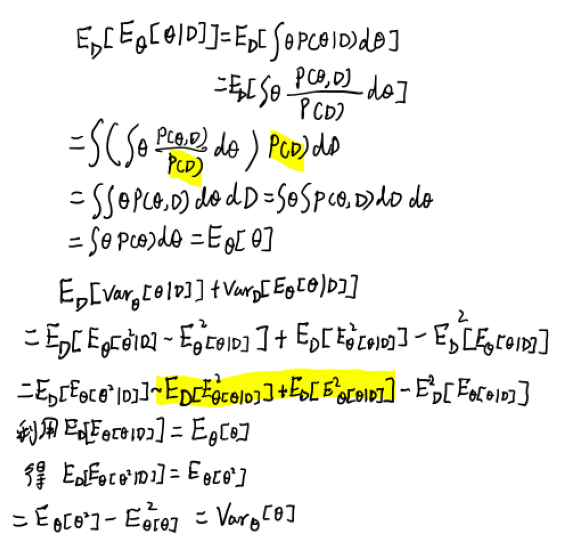

In [23]:
# 频率学证明
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.1.1频率学证明.png')
plt.axis('off')
ax.imshow(d)

## 2.2多项式变量
二元变量：2个状态。推广到k个互斥状态。用one-hot表示。比如K=6，$x_3=1$：

$$ x = (0, 0, 1, 0, 0, 0)^T \tag{2.25} $$

向量满足$\sum_{k=1}^K x_k = 1 $。如果用参数$ \mu_k $来标记$ x_k = 1 $的概率，那么我们就得到$ x $的分布：

$$ p(x|\mu) = \prod\limits_{k=1}^K\mu_k^{x_k} \tag{2.26} $$

其中$\mu = (\mu_1,...,\mu_K)^T $，由于参数$ \mu_k $表示概率，所以需要满足$\mu_k \geq 0 $且$ \sum_k\mu_k = 1 $。公式（2.26）分布可以看作伯努利分布在多于两种输出时的泛化。很容易证明这个分布是标准化的。

$ \sum\limits_xp(x|\mu) = \sum\limits_{k=1}^K\mu_k = 1 \tag{2.27} $

且

$ \mathbb{E}[x|\mu] = \sum\limits_xp(x|\mu)x = (\mu_1,...,\mu_M)^T = \mu \tag{2.28} $

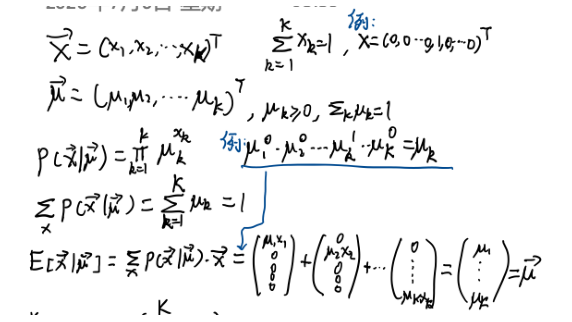

In [3]:
# 多项式变量
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.2多项式变量.png')
plt.axis('off')
ax.imshow(d)

考虑一个有$ N $个独立观测值$ x_1,...,x_N $的数据集$ D $。其对应的似然函数的形式为

$$ p(D|\mu) = \prod\limits_{n=1}^N\prod\limits_{k=1}^K\mu_k^{x_{nk}} = \prod\limits_{k=1}^K\mu_k^{(\sum_nx_{nk})} = \prod\limits_{k=1}^K\mu_k^{m_k} \tag{2.29} $$

令：

$ m_k = \sum\limits_n x_{nk} \tag{2.30} $ 
它表示观测到$ x_k = 1 $的次数。这些别称为这个分布的充分统计量。


求最大似然解，我们需要在$ \mu_k $的和等于1的约束下，关于$\mu_k $最大化$ \ln p(D|\mu) $。这可以通过拉格朗日乘数法得到，即：

$ \sum\limits_{k=1}^{K}m_k\ln\mu_k + \lambda(\sum\limits_{k=1}^K\mu_k - 1 ) \tag{2.31} $

对公式（2.31）关于$ \mu_k $求导并使之等于0得到：

$ \mu_k = -m_k / \lambda \tag{2.32} $

把公式（2.32）代入限制条件$ \sum_k\mu_k = 1 $，可得$ \lambda = -N $。所以我们的最大似然解：

$$ \mu_k^{ML} = \frac{m_k}{N} \tag{2.33} $$

就是观测$x_k = 1$出现占总观测的比例。



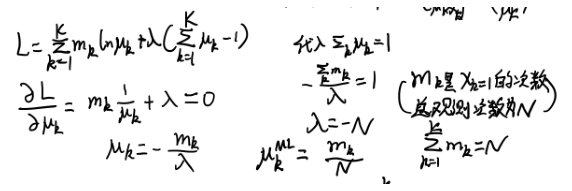

In [4]:
# 最大似然
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.2最大似然.png')
plt.axis('off')
ax.imshow(d)

考虑$ m_1,...,m_K $在参数$ \mu $和观测总数N条件下联合分布。通过公式（2.29）得到：

$ Mult(m_1,...,m_k|\mu,N) = \binom{N}{m_1m_2...m_k}\prod\limits_{k=1}^K\mu_k^{m_k} \tag{2.34} $

这就是多项式分布。标准化系数是把N个物体分成大小为$$ m_1,...,m_K $$的K组的方案总数，定义为

$$ \binom{N}{m_1m_2...m_k} = \frac{N!}{m_1!m_2!...m_k!} \tag{2.35} $$

$ m_k $满足下面的约束：
$$ \sum\limits_{k=1}^Km_k = N \tag{2.36} $$

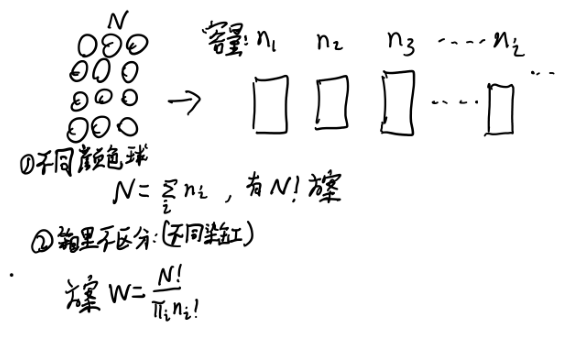

In [2]:
# 小球染缸
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/1.6小球图示.png')
plt.axis('off')
ax.imshow(d)

In [5]:
model = Categorical()
model.fit(np.array([[0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1]]))
print(model)

Categorical(
    mu=[0.5  0.25 0.25]
)


## 2.2.1狄利克雷分布
多项式分布参数$ {\mu_k} $的一组先验分布。观察多项式分布的公式，得到共轭先验：
$ p(\mu|\alpha) \propto \prod\limits_{k=1}^{K}\mu_k^{\alpha_k - 1} \tag{2.37}$

其中$ 0 \leq \mu_k \leq 1 , \sum_k\mu_k = 1 $，$ (\alpha_1,...,\alpha_K)^T $记作$ \alpha $是分布的参数。注意，由于总和的限制，$ {\mu_k} $空间上的分布被限制在$ K − 1 $维的单纯形中。图2.4展示了$ K = 3 $的情形。

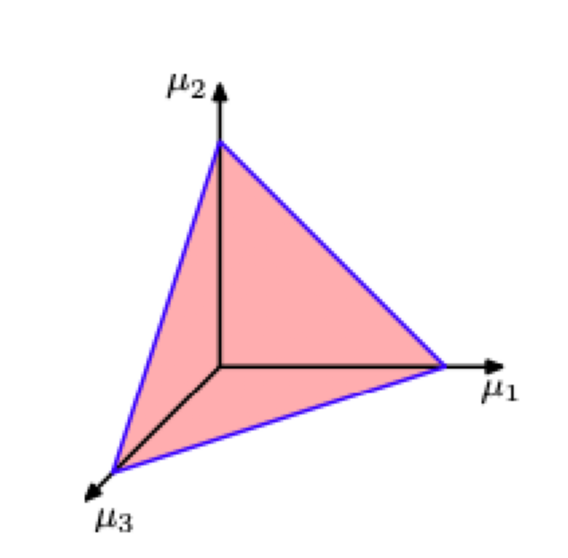

In [9]:
# 单纯形
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.2.1单纯形.png')
plt.axis('off')
ax.imshow(d)

归一化得到:(归纳法，习题2.9有思路)

$$ Dir(\mu|\alpha) = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)...\Gamma(\alpha_K)}\prod\limits_{k=1}^K\mu_k^{\alpha_k - 1} \tag{2.38} $$

狄利克雷分布。而且：

$$ \alpha_0 = \sum\limits_{k=1}^K\alpha_k \tag{2.39} $$

图2.5有不同参数下的图像：分布对应$$ {\alpha_k} = 0.1, {\alpha_k} = 1, {\alpha_k} = 10 $$。

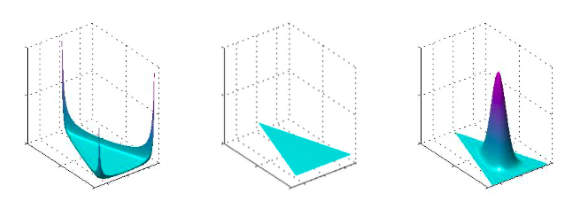

In [12]:
# 不同参数下图像
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.2.1不同参数下的图像.png')
plt.axis('off')
ax.imshow(d)

用似然2.34乘先验2.38就得到后验，形式为：
$$ p(\mu|D,\alpha) \propto p(D|\mu)p(\mu|\alpha) \propto \prod\limits_{k=1}^K\mu_k^{\alpha_k + m_k - 1} \tag{2.40} $$

因为形式与先验相同，对比写出归一化系数：

$$ \begin{eqnarray} p(\mu|D, \alpha) &=& Dir(\mu|\alpha + m) \ &=& \frac{\Gamma(\alpha_0 + N)}{\Gamma(\alpha_1+m_1)...+\Gamma(\alpha_K+m_K)}\prod\limits_{k=1}^K\mu_k^{\alpha_k + m_k - 1} \tag{2.41} \end{eqnarray} $$

其中$ m = (m_1,...,m_K)^T $。与二项分布的beta先验一样，可以把狄利克雷分布参数$ \alpha_k $当成观测到$ x_k = 1 $的数量。而二元变量就是多项式变量的一个特例。

In [6]:
mu = Dirichlet(alpha=np.ones(3))
model = Categorical(mu=mu)
print(model)

model.fit(np.array([[1., 0., 0.], [1., 0., 0.], [0., 1., 0.]]))
print(model)

Categorical(
    mu=Dirichlet(
        alpha=[1. 1. 1.]
    )
)
Categorical(
    mu=Dirichlet(
        alpha=[3. 2. 1.]
    )
)


## 2.3 高斯分布
单变量x，

$\mathcal{N}\left(x | \mu, \sigma^{2}\right)=\frac{1}{\left(2 \pi \sigma^{2}\right)^{\frac{1}{2}}} \exp \left\{-\frac{1}{2 \sigma^{2}}(x-\mu)^{2}\right\} \tag{2.42} $

D维向量x，

$$ \mathcal{N}(x|\mu, \Sigma) = \frac{1}{(2\pi)^{D/2}} \frac{1}{|\Sigma|^{1/2}} exp\{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x - \mu)\} \tag{2.43} $$


不同理解角度：

・熵取得最大值的是高斯分布。<p>
・一组随机变量之和，概率分布随着项（随机变量个数）增加趋近于高斯分布。（拉普拉斯中心极限定理）比如均匀分布还有之前的二项分布

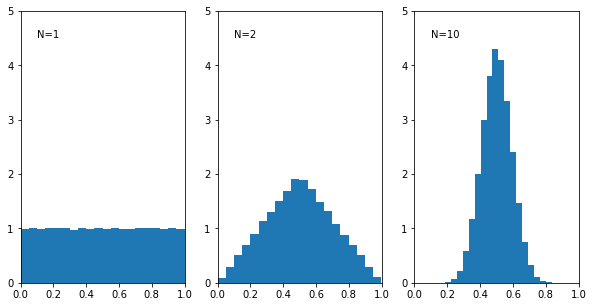

In [3]:
# 均匀分布
uniform = Uniform(low=0, high=1)
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.annotate("N=1", (0.1, 4.5))
plt.hist(uniform.draw(100000), bins=20, density=True)

plt.subplot(1, 3, 2)
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.annotate("N=2", (0.1, 4.5))
plt.hist(0.5 * (uniform.draw(100000) + uniform.draw(100000)), bins=20, density=True)

plt.subplot(1, 3, 3)
plt.xlim(0, 1)
plt.ylim(0, 5)
sample = 0
for _ in range(10):
    sample = sample + uniform.draw(100000)
plt.annotate("N=10", (0.1, 4.5))
plt.hist(sample * 0.1, bins=20, density=True)

plt.show()

这节介绍高斯函数的性质。首先是高斯分布的几何形式，高斯对于x的依赖是通过下面二次型的形式：<p>
$$ \Delta^2 = (X-\mu)^T\Sigma^{-1}(X-\mu) \tag{2.44} $$
    
这里$\Delta$就是$x和\mu$之间的马氏距离。当$\Sigma$是单位矩阵时候就是欧式距离。x空间中这个二次型是常数曲面，高斯分布是常数。

矩阵$\Sigma$可以取为对称矩阵，而不失去一般性，因为任何非对称项都会从指数中消失。

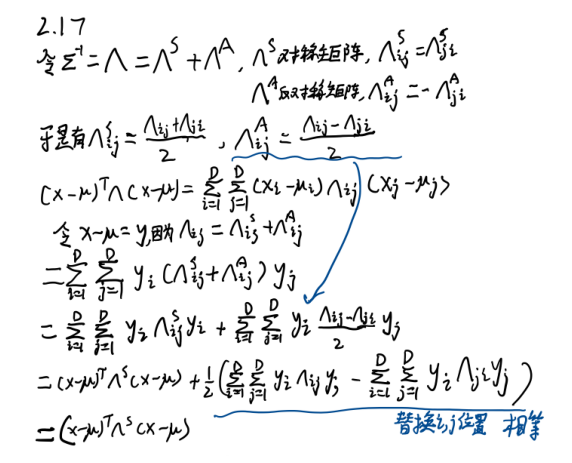

In [6]:
# 对称性证明
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3对称性证明.png')
plt.axis('off')
ax.imshow(d)

现在考虑协方差矩阵的特征向量方程：

$$ \Sigma u_i = \lambda_iu_i \tag{2.45} $$

其中$ i = 1,...,D $。因为$ \Sigma $是实对称矩阵，所以它的特征值也是实数，特征向量可以是单位正交，得到：

$ u_i^Tu_j = I_{ij} \tag{2.46} $

其中$ I_{ij} $是单位矩阵的第$ i,j $个元素，满足：

$$
I_{i j}=\left\{\begin{array}{ll}
1, & \text { 如果 } i=j \\
0, & \text { 其他情况 }
\end{array}\right. \tag{2.47}
$$
也就是相同为1，不同为0.

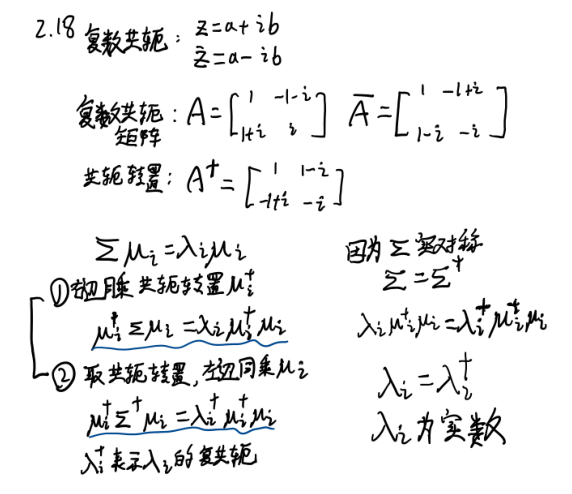

In [7]:
# 推导实数
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3推导实数.png')
plt.axis('off')
ax.imshow(d)

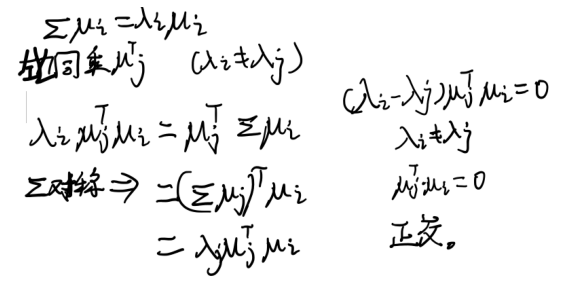

In [23]:
# 推导正交
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3推导正交.png')
plt.axis('off')
ax.imshow(d)

协方差矩阵$ \Sigma $可以表示成特征向量的展开的形式：

$$ \Sigma = \sum\limits_{i=1}^D\lambda_iu_iu_i^T \tag{2.48} $$

同样的协方差的逆矩阵$ \Sigma^{-1} $可以表示为

$$ \Sigma^{-1} = \sum\limits_{i=1}^D\frac{1}{\lambda_i}u_iu_i^T \tag{2.49} $$

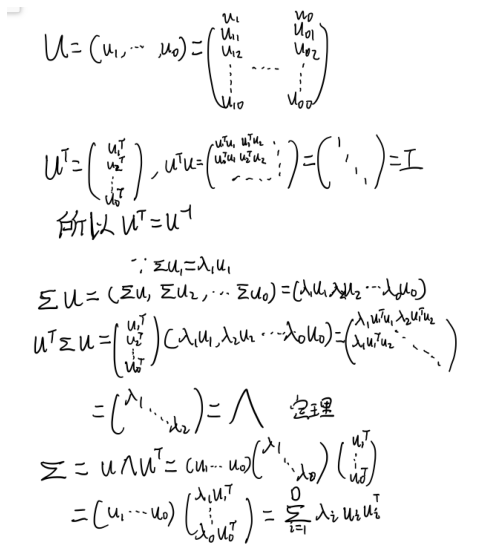

In [9]:
# 推导展开
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3推导展开.png')
plt.axis('off')
ax.imshow(d)

公式（2.49）代入（2.44），可以把二次型表示为：

$$ \Delta^2 = \sum\limits_{i=1}^D \frac{y_i^2}{\lambda_i} \tag{2.50} $$

其中

$$ y_i = u_i^T(x - \mu) \tag{2.51} $$ 

我们可以把$ {y_i} $解释为由正交向量$ u_i $关于原来的$ x_i $坐标系平移和旋转之后得到的新坐标系。记$ Y = (y_1,...,y_D)^T $，可得：

$$ Y = U(X - \mu) \tag{2.52} $$

其中$ U $是由行向量$ u_i^T $组成的。根据公式（2.46）可得$ U $是正交矩阵，即它满足$UU^T = I, U^TU = I $,其中$ I $是单位矩阵。
 


如果公式（2.50）是常数时，那么二次型和高斯密度在曲面上为常数。如果所有特征值$ \lambda_i $都是正的，那么这些曲面是中心位于$ \mu $，轴方向为$ u_i $，轴方向的缩放比例为$ \lambda_i^{1/2} $的椭球面，如图2.7所示。
   

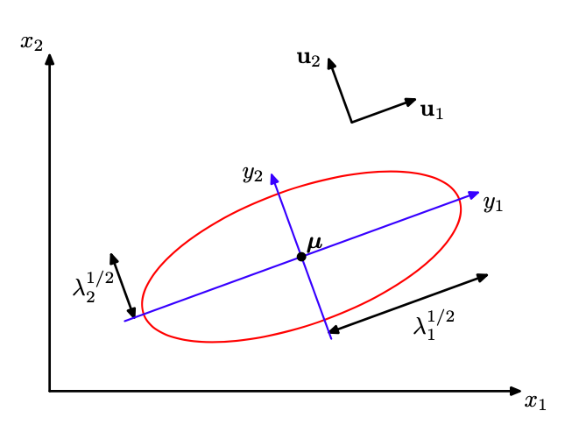

In [11]:
# 椭球
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3椭球.png')
plt.axis('off')
ax.imshow(d)

协方差矩阵的所有特征值都严格大于零，为了正确归一化。这就是正定矩阵。(2.57解释)

如果所有特值都是非负的，就是半正定矩阵。

现在考虑y顶一下的高斯分布形式，就是进行了一次坐标变化，Jacobian矩阵的元素为：

$$ J_{ij} = \frac{\partial x_i}{\partial y_j} = U_{ji} \tag{2.53} $$

其中$ U_{ji} $是矩阵$ U^T $的元素。有矩阵$ U $的正交性，可得

$$ |J|^2 = |U^T|^2 = |U^T||U| = |U^TU| = |I| = 1 \tag{2.54} $$

由此可得$ |J| = 1 $。且协方差矩阵的行列式$ |\Sigma| $可以写成特征值的乘积：

$$ |\Sigma|^{1/2} = \prod\limits_{j=1}^D \lambda_j^{1/2} \tag{2.55} $$

因此，在$ y_j $坐标系下，高斯分布由以下形式：

$$
p(\boldsymbol{y})=p(\boldsymbol{x})|\boldsymbol{J}|=\prod_{j=1}^{D} \frac{1}{\left(2 \pi \lambda_{j}\right)^{\frac{1}{2}}} \exp \left\{-\frac{y_{j}^{2}}{2 \lambda_{j}}\right\} \tag{2.56}
$$

它具有归一化：
$$
\int p(\boldsymbol{y}) \mathrm{d} \boldsymbol{y}=\prod_{j=1}^{D} \int_{-\infty}^{\infty} \frac{1}{\left(2 \pi \lambda_{j}\right)^{\frac{1}{2}}} \exp \left\{-\frac{y_{j}^{2}}{2 \lambda_{j}}\right\} \mathrm{d} y_{j}=1 \tag{2.57}
$$


期望：
$$
\begin{aligned}
\mathbb{E}[\boldsymbol{x}] &=\frac{1}{(2 \pi)^{\frac{D}{2}}} \frac{1}{|\mathbf{\Sigma}|^{\frac{1}{2}}} \int \exp \left\{-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^{T} \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right\} \boldsymbol{x} \mathrm{d} \boldsymbol{x} \\
&=\frac{1}{(2 \pi)^{\frac{D}{2}}} \frac{1}{|\boldsymbol{\Sigma}|^{\frac{1}{2}}} \int \exp \left\{-\frac{1}{2} \boldsymbol{z}^{T} \boldsymbol{\Sigma}^{-1} \boldsymbol{z}\right\}(\boldsymbol{z}+\boldsymbol{\mu}) \mathrm{d} \boldsymbol{z}
\end{aligned} \tag{2.58}
$$
用$z=x-\mu$替换
$$ \mathbb{E}[X] = \mu \tag{2.59} $$

二阶矩是：
$$
\begin{aligned}
\mathbb{E}\left[\boldsymbol{x} \boldsymbol{x}^{T}\right] &=\frac{1}{(2 \pi)^{\frac{D}{2}}} \frac{1}{|\mathbf{\Sigma}|^{\frac{1}{2}}} \int \exp \left\{-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^{T} \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right\} \boldsymbol{x} \boldsymbol{x}^{T} \mathrm{d} \boldsymbol{x} \\
&=\frac{1}{(2 \pi)^{\frac{D}{2}}} \frac{1}{|\boldsymbol{\Sigma}|^{\frac{1}{2}}} \int \exp \left\{-\frac{1}{2} \boldsymbol{z}^{T} \boldsymbol{\Sigma}^{-1} z\right\}(\boldsymbol{z}+\boldsymbol{\mu})(\boldsymbol{z}+\boldsymbol{\mu})^{T} \mathrm{d} \boldsymbol{z}
\end{aligned}
$$

$也用z=x-\mu$来替换。交叉项$\mu z^T和z\mu^T$因为对称性抵消，$\mu\mu^T$为常数可以拿出，本身又是单位向量被归一化。对于$zz^T$项，我们可以得到
$$ z = \sum\limits_{j=1}^Dy_ju_j \tag{2.60} $$

其中$ y_j = u_j^Tz $

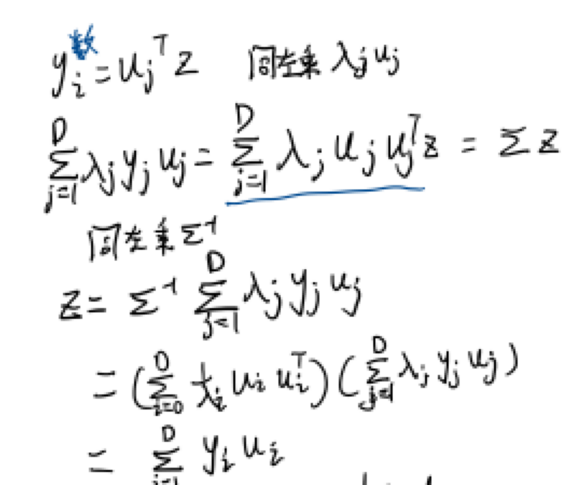

In [19]:
# 推2.60
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.32.60.png')
plt.axis('off')
ax.imshow(d)

推出：
$$
\begin{aligned}
\frac{1}{(2 \pi)^{\frac{D}{2}}} & \frac{1}{|\mathbf{\Sigma}|^{\frac{1}{2}}} \int \exp \left\{-\frac{1}{2} \boldsymbol{z}^{T} \mathbf{\Sigma}^{-1} \boldsymbol{z}\right\} \boldsymbol{z} \boldsymbol{z}^{T} \mathrm{d} \boldsymbol{z} \\
&=\frac{1}{(2 \pi)^{\frac{D}{2}}} \frac{1}{|\mathbf{\Sigma}|^{\frac{1}{2}}} \sum_{i=1}^{D} \sum_{j=1}^{D} \boldsymbol{u}_{i} \boldsymbol{u}_{j}^{T} \int \exp \left\{-\sum_{k=1}^{D} \frac{y_{k}^{2}}{2 \lambda_{k}}\right\} y_{i} y_{j} \mathrm{d} \boldsymbol{y} \\
&=\sum_{i=1}^{D} \boldsymbol{u}_{i} \boldsymbol{u}_{i}^{T} \lambda_{i}=\boldsymbol{\Sigma}
\end{aligned} \tag{2.61}
$$

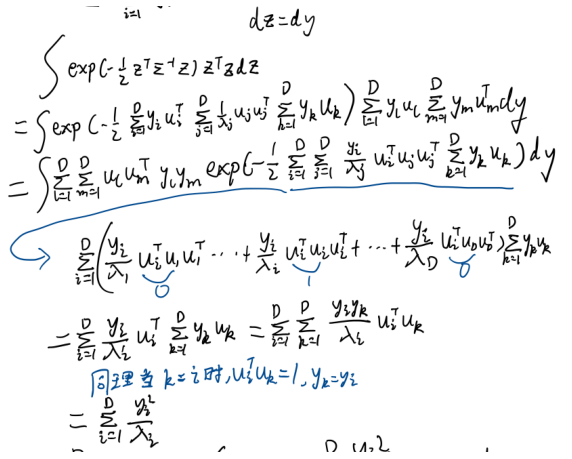

In [20]:
# 推2.61
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.32.61.1.png')
plt.axis('off')
ax.imshow(d)

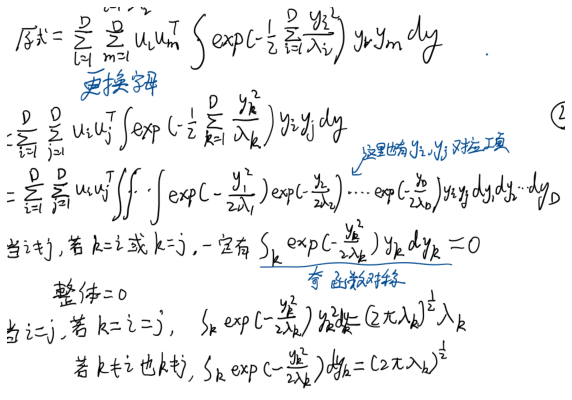

In [22]:
# 推2.61
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.32.61.2.png')
plt.axis('off')
ax.imshow(d)

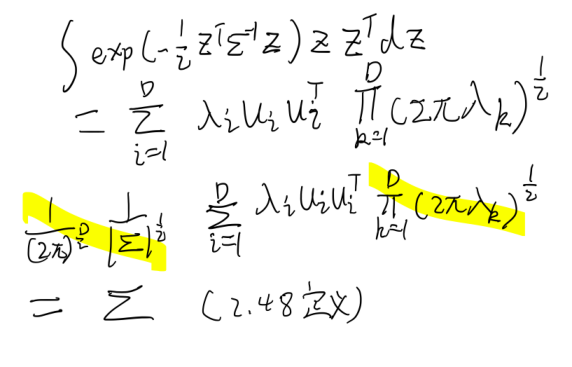

In [21]:
# 推2.61
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.32.61.3.png')
plt.axis('off')
ax.imshow(d)


所以
$$ \mathbb{E}[XX^T] = \mu\mu^T + \Sigma \tag{2.62} $$
所以
$$ var[X] = \mathbb{E}[(X - \mathbb{E}[X])(X - \mathbb{E}[X])^T] \tag{2.63} $$
$$ var[X] = \Sigma $$



高斯分布的问题，参数太多，平方增长，无法求逆。
- 一个对称协方差$\Sigma$有$D(D+1)/2$个参数,$\mu$有D个参数，一共$D(D+3)/2$个参数。
- 一个对角协方差矩阵$\Sigma=diag(\sigma_i^2)$，一共2D个参数
- 再正比于单位矩阵$\Sigma=\sigma^2I$,一共D+1个参数。
常数概率密度轮廓线如下

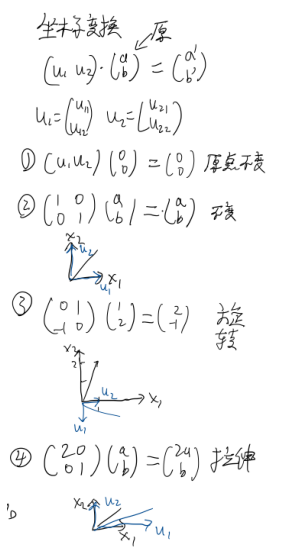

In [17]:
# 坐标变换
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3坐标变换.png')
plt.axis('off')
ax.imshow(d)

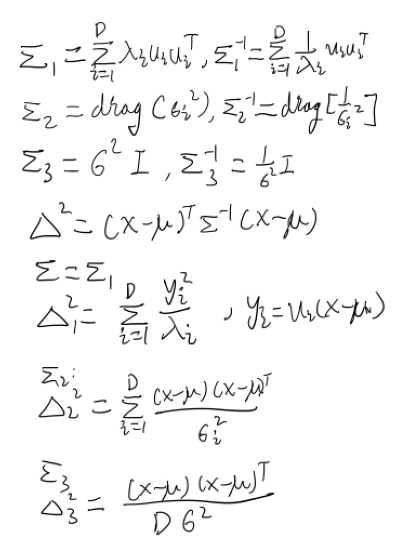

In [18]:
# 轮廓线说明
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3轮廓线说明.png')
plt.axis('off')
ax.imshow(d)

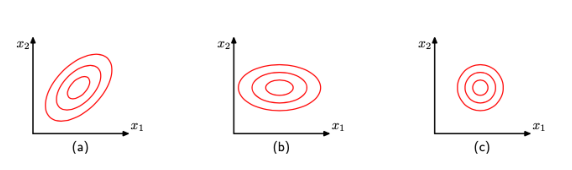

In [12]:
# 常数概率密度轮廓线
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3常数概率密度.png')
plt.axis('off')
ax.imshow(d)

另一局限性是单峰的，不能近似多峰问题，可以近似的概率有限。

引入潜在变量，来解决>HMM，卡尔曼滤波器，马尔可夫随机场之类的。

参考资料：
- https://qiita.com/ZaKama/items/c6c3f9259421c3b6e2ad
- https://twitter.com/d_nishiyama85/status/971793242692857856/photo/1
- https://www.zhihu.com/question/302165181
- https://hushtheblock.github.io/2020/06/05/PRML-2.61/
- https://www.zhihu.com/question/61984983


## 2.3.1条件高斯分布
多元高斯性质：两个变量的联合高斯分布，一个变量为条件的高斯分布也是高斯分布。边缘高斯分布也是高斯分布。这节看条件高斯分布。

假设$x $是服从高斯分布$ \mathcal{N}(x|\mu, \Sigma) $的$D $维向量，把$ x $划分为两个不相交的子集$ x_a, x_b $。令$ x_a $为$ x $的前$ M $个分量，令$ x_b $为剩余的$ D − M $个分量，得到：
$$
\boldsymbol{x}=\left(\begin{array}{l}
\boldsymbol{x}_{a} \\
\boldsymbol{x}_{b}
\end{array}\right) \tag{2.65}
$$

$$
\boldsymbol{\mu}=\left(\begin{array}{l}
\boldsymbol{\mu}_{a} \\
\boldsymbol{\mu}_{b}
\end{array}\right) \tag{2.66}
$$


$$
\boldsymbol{\Sigma}=\left(\begin{array}{cc}
\boldsymbol{\Sigma}_{a a} & \boldsymbol{\Sigma}_{a b} \\
\boldsymbol{\Sigma}_{b a} & \boldsymbol{\Sigma}_{b b}
\end{array}\right) \tag{2.67} $$

协方差矩阵是对称的即$ \Sigma^T = \Sigma $，可得$\Sigma_{aa},\Sigma_{bb} $也是对称的，且$ \Sigma_{ba} = \Sigma_{ab}^T $。

在很多情况下，使用协方差的逆矩阵会比较方便，记：

$$ \Lambda \equiv \Sigma^{-1} \tag{2.68} $$

这被称为精度矩阵（precision matrix）。
$$
\boldsymbol{\Lambda}=\left(\begin{array}{cc}
\boldsymbol{\Lambda}_{a a} & \boldsymbol{\Lambda}_{a b} \\
\boldsymbol{\Lambda}_{b a} & \boldsymbol{\Lambda}_{b b}
\end{array}\right) \tag{2.69} $$


因为对称矩阵的逆同样是对称的，所以$ \Lambda_{aa},\Lambda_{bb} $也是对称的，且$ \Lambda_{ab}^T = \Lambda_{ba} $。需要强调的一点是：$ \Lambda_{aa} $不单单是对$ \Sigma_{aa} $求逆这么简单。


首先，找到条件分布$ p(x_a|x_b) $的条件分布。根据概率的乘法规则，由联合分布 $ p(x) = p(x_a, x_b) $通过固定$ x_b $为观测到的值，然后标准化所得到的表达式就可以得到$ x_a $上的有效概率。

简单说就是先算二次型，再算系数。确定均值和方差。

二次型：
$$ \begin{eqnarray} &-\frac{1}{2}&(x-\mu)^T\Sigma^{-1}(x-\mu) = \ &-\frac{1}{2}&(x_a - \mu_a)^T\Lambda_{aa}(x_a - \mu_a) -\frac{1}{2}(x_a - \mu_a)^T\Lambda_{ab}(x_b - \mu_b) \ &-\frac{1}{2}&(x_b - \mu_b)^T\Lambda_{ba}(x_a - \mu_a) -\frac{1}{2}(x_b - \mu_b)^T\Lambda_{bb}(x_b - \mu_b) \tag{2.70} \end{eqnarray} $$

把它看成$ x_a $的函数，这又是一个二次型，可以推出对应的条件分布$ p(x_a|x_b) $是高斯分布。

一个通用的的高斯分布$ \mathcal{N}(x|\mu, \Sigma) $的指数项可以写成：

$$ -\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu) = -\frac{1}{2}x^T\Sigma^{-1}x + x^T\Sigma^{-1}\mu + const \tag{2.71} $$

然后直接对应系数就可以求得均值和方差。

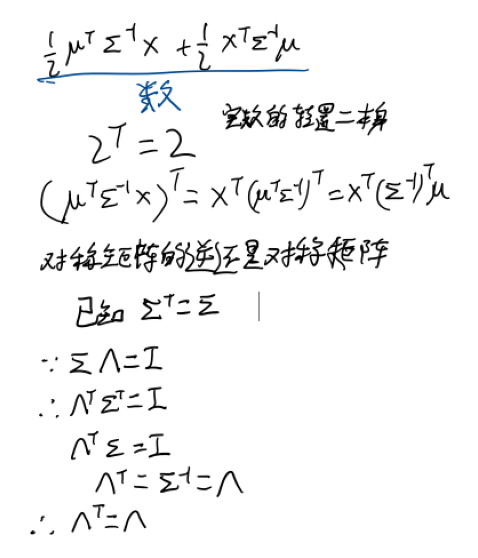

In [6]:
# 通用高斯分布
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3.1通用高斯分布.png')
plt.axis('off')
ax.imshow(d)

如果我们选出所有$x_a $的二阶项，就有：

$$ -\frac{1}{2}x_a^T\Lambda_{aa}x_a \tag{2.72} $$

从这个公式中可以得到，$ p(x_a|x_b) $的协方差（精度矩阵的逆）：

$$ \Sigma_{a|b} = \Lambda_{aa}^{-1} \tag{2.73} $$


现在，考虑式（2.70）中$ x_a $的所有线性项：

$$
\boldsymbol{x}_{a}^{T}\left\{\boldsymbol{\Lambda}_{a a} \boldsymbol{\mu}_{a}-\boldsymbol{\Lambda}_{a b}\left(\boldsymbol{x}_{b}-\boldsymbol{\mu}_{b}\right)\right\}
\tag{2.74}$$

所以，
$$
\begin{aligned}
\boldsymbol{\mu}_{a \mid b} &=\boldsymbol{\Sigma}_{a \mid b}\left\{\boldsymbol{\Lambda}_{a a} \boldsymbol{\mu}_{a}-\boldsymbol{\Lambda}_{a b}\left(\boldsymbol{x}_{b}-\boldsymbol{\mu}_{b}\right)\right\} \\
&=\boldsymbol{\mu}_{a}-\boldsymbol{\Lambda}_{a a}^{-1} \boldsymbol{\Lambda}_{a b}\left(\boldsymbol{x}_{b}-\boldsymbol{\mu}_{b}\right)
\end{aligned} \tag{2.75}
$$

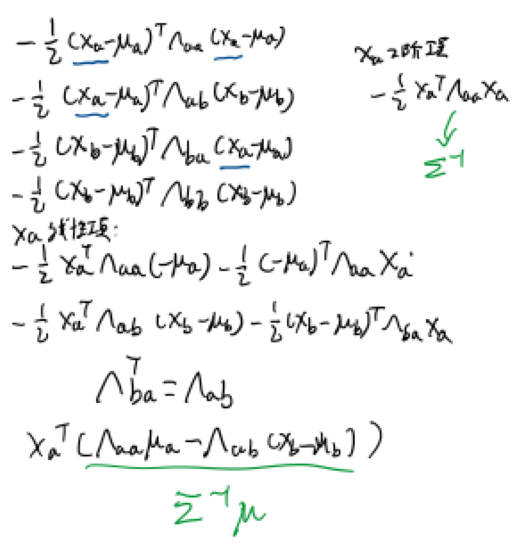

In [7]:
# 二阶项和线性项
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3.1二阶项和线性项.png')
plt.axis('off')
ax.imshow(d)

然后将精度矩阵替换回协方差矩阵：

用：
$$
\left(\begin{array}{cc}
\boldsymbol{A} & \boldsymbol{B} \\
\boldsymbol{C} & \boldsymbol{D}
\end{array}\right)^{-1}=\left(\begin{array}{cc}
\boldsymbol{M} & -\boldsymbol{M} \boldsymbol{B} \boldsymbol{D}^{-1} \\
-\boldsymbol{D}^{-1} \boldsymbol{C M} & \boldsymbol{D}^{-1}+\boldsymbol{D}^{-1} \boldsymbol{C M B D}^{-1}
\end{array}\right)
\tag{2.76}
$$

其中$$ M = (A - BD^{-1}C)^{-1} \tag{2.77} $$

$ M^{-1} $是式（2.76）左手边矩阵关于矩阵$ D $的（Schur complement）。


$$
\begin{array}{c}
\boldsymbol{\Lambda}_{a a}=\left(\boldsymbol{\Sigma}_{a a}-\boldsymbol{\Sigma}_{a b} \boldsymbol{\Sigma}_{b b}^{-1} \boldsymbol{\Sigma}_{b a}\right)^{-1} \\ \tag{2.79,2.80}
\boldsymbol{\Lambda}_{a b}=-\left(\boldsymbol{\Sigma}_{a a}-\boldsymbol{\Sigma}_{a b} \boldsymbol{\Sigma}_{b b}^{-1} \boldsymbol{\Sigma}_{b a}\right)^{-1} \boldsymbol{\Sigma}_{a b} \boldsymbol{\Sigma}_{b b}^{-1}
\end{array} 
$$

从这些公式中，得到条件概率$$ p(x_a|x_b) $$的均值和方差的表达式为
$$
\begin{array}{c}
\boldsymbol{\mu}_{a \mid b}=\boldsymbol{\mu}_{a}+\boldsymbol{\Sigma}_{a b} \boldsymbol{\Sigma}_{b b}^{-1}\left(\boldsymbol{x}_{b}-\boldsymbol{\mu}_{b}\right) \\ \tag{2.81, 2.82}
\boldsymbol{\Sigma}_{a \mid b}=\boldsymbol{\Sigma}_{a a}-\boldsymbol{\Sigma}_{a b} \boldsymbol{\Sigma}_{b b}^{-1} \boldsymbol{\Sigma}_{b a}
\end{array}
$$

均值是$x_b$的线性函数。

## 2.3.2边缘高斯分布
联合分布是高斯$ p(x_a, x_b) $，推出条件分布$ p(x_a|x_b) $是高斯和边缘分布是高斯。

$$ p(x_a) = \int p(x_a, x_b)dx_b \tag{2.83} $$

利用二次型也可以来确定均值和方差。

补充解释：联合概率的二次型可以确定条件分布，边缘分布的二次型的原因。$x_a,x_b$系数相同。

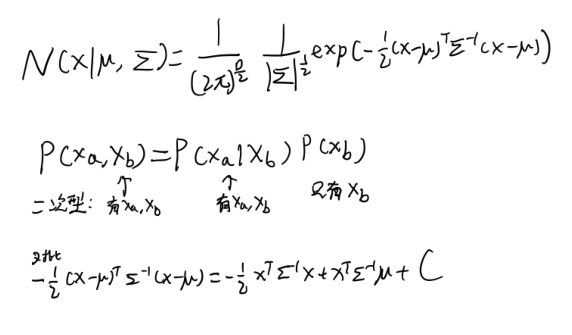

In [13]:
# 补充解释
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3.2补充解释.png')
plt.axis('off')
ax.imshow(d)

目标是积掉$x_b$，只提出2.70里面的$x_b$项，然后配方。


$$ -\frac{1}{2}x_b^T\Lambda_{bb}x_b + x_b^Tm = -\frac{1}{2}(x_b-\Lambda_{bb}^{-1}m)^T\Lambda_{bb}(x_b-\Lambda_{bb}^{-1}m) + \frac{1}{2}m^T\Lambda_{bb}^{-1}m \tag{2.84} $$

其中

$$ m = \Lambda_{bb}\mu_b - \Lambda_{ba}(x_a - \mu_a) \tag{2.85} $$

带入2.83，然后先只看有$x_b$项。得到未归一化的高斯形式,与均值无关：

$$
\int \exp \left\{-\frac{1}{2}\left(\boldsymbol{x}_{b}-\boldsymbol{\Lambda}_{b b}^{-1} \boldsymbol{m}\right)^{T} \boldsymbol{\Lambda}_{b b}\left(\boldsymbol{x}_{b}-\boldsymbol{\Lambda}_{b b}^{-1} \boldsymbol{m}\right)\right\} \mathrm{d} \boldsymbol{x}_{b} \tag{2.86}
$$

$x_b$就积分积掉了。再看剩余的第二项，与2.70中$x_a$相关的集合，写出


$$ \begin{eqnarray} &\frac{1}{2}&\left[\Lambda_{bb}\mu_b - \Lambda_{ba}(x_a - \mu_a)\right]^T\Lambda_{bb}^{-1}\left[\Lambda_{bb}\mu_b - \Lambda_{ba}(x_a - \mu_a)\right] \ & & -\frac{1}{2}x_a^T\Lambda_{aa}x_a + x_a^T(\Lambda_{aa}\mu_a + \Lambda_{ab}\mu_b) + const \ &=& -\frac{1}{2}x_a^T(\Lambda_{aa} - \Lambda_{ab}\Lambda_{bb}^{-1}\Lambda_{ba})x_a \ & & + x_a^T(\Lambda_{aa} - \Lambda_{ab}\Lambda_{bb}^{-1}\Lambda_{ba})^{-1}\mu_a + const \tag{2.87} \end{eqnarray} $$

常数是与$x_a$无关项。

与2.71比较写出均值和协方差：
$$ \Sigma_a = (\Lambda_{aa} - \Lambda_{ab}\Lambda_{bb}^{-1}\Lambda_{ba})^{-1} \tag{2.88} $$

$$ \Sigma_a(\Lambda_{aa} - \Lambda_{ab}\Lambda_{bb}^{-1}\Lambda_{ba})\mu_a = \mu_a \tag{2.89} $$





再将精度矩阵换回协方差矩阵
$$
\begin{aligned}
\mathbb{E}\left[\boldsymbol{x}_{a}\right] &=\boldsymbol{\mu}_{a} \\
\operatorname{cov}\left[\boldsymbol{x}_{a}\right] &=\boldsymbol{\Sigma}_{a a}
\end{aligned} \tag{2.92,2.93}
$$

**简洁**

分区高斯的边缘或条件分布总结如下：

对于联合高斯分布$$ \mathcal{N}(x|\mu,\Sigma) , \Lambda \equiv \Sigma^{-1} $$如果拆成两块。

条件分布：
$$ p(x_a|x_b) = \mathcal{N}(x|\mu_{a|b}, \Lambda_{aa}^{-1}) \tag{2.96} $$ $$ \mu_{a|b} = \mu_a - \Lambda_{aa}^{-1}\Lambda_{ab}(x_a - \mu_b) \tag{2.97} $$

边缘分布：
$$ p(x_a) = \mathcal{N}(x_a|\mu_a, \Sigma_{aa}) \tag{2.98} $$

图2.9展示涉及到两个变量的多元高斯分布的条件概率分布和边缘概率分布

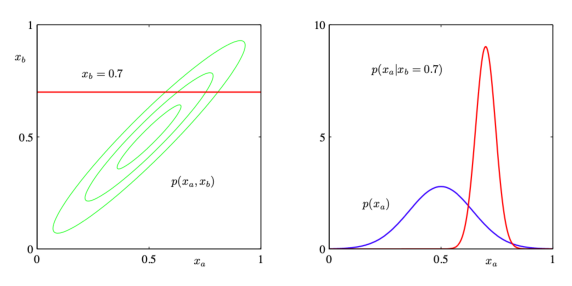

In [14]:
# 2.9
fig, ax = plt.subplots(figsize=(10, 10))
d = plt.imread('./graph/2.3.2概率图.png')
plt.axis('off')
ax.imshow(d)

## 2.3.3 高斯变量的贝叶斯定理
假设给定高斯边缘分布$ p(x) $和均值是关于$ x $的线性函数且方差与$ x $无关的高斯条件分布$ p(y|x) $。这是线性高斯模型（linear Gaussian model）的一个例子。

把边缘和条件分布记为：
$$
\begin{array}{r}
p(\boldsymbol{x})=\mathcal{N}\left(\boldsymbol{x} \mid \boldsymbol{\mu}, \boldsymbol{\Lambda}^{-1}\right) \\
p(\boldsymbol{y} \mid \boldsymbol{x})=\mathcal{N}\left(\boldsymbol{y} \mid \boldsymbol{A} \boldsymbol{x}+\boldsymbol{b}, \boldsymbol{L}^{-1}\right)
\end{array} \tag{2.99,2.100}
$$

其中$ \mu, A, b $是控制均值的参数，$ \Lambda , L $是精度矩阵。设$ x,y $分别是$ M,D $维的，那么矩阵$ A $是$ D \times M $矩阵。




首先求x，y的联合分布。

$$ z = \left( \begin{array}{c} 
x \\ y \end{array} \right) \tag{2.101} $$

求对数：

$$ \begin{eqnarray} \ln p(z) &=& \ln p(x) + \ln p(y|x) \ &=& -\frac{1}{2}(x - \mu)^T\Lambda(x-\mu) \ & & -\frac{1}{2}(y-Ax-b)^TL(y-Ax-b) + const \tag{2.102} \end{eqnarray} $$

常数是与x，y无关的项。z的分量的二次函数》高斯函数。

为了计算高斯分布的**精度**，看二阶项：
$$
-\frac{1}{2} \boldsymbol{x}^{T}\left(\boldsymbol{\Lambda}+\boldsymbol{A}^{T} \boldsymbol{L} \boldsymbol{A}\right) \boldsymbol{x}-\frac{1}{2} \boldsymbol{y}^{T} \boldsymbol{L} \boldsymbol{y}+\frac{1}{2} \boldsymbol{y}^{T} \boldsymbol{L} \boldsymbol{A} \boldsymbol{x}+\frac{1}{2} \boldsymbol{x}^{T} \boldsymbol{A}^{T} \boldsymbol{L} \boldsymbol{y}
$$
$$
=-\frac{1}{2}\left(\begin{array}{c}
\boldsymbol{x} \\
\boldsymbol{y}
\end{array}\right)^{T}\left(\begin{array}{cc}
\boldsymbol{\Lambda}+\boldsymbol{A}^{T} \boldsymbol{L} \boldsymbol{A} & -\boldsymbol{A}^{T} \boldsymbol{L} \\
-\boldsymbol{L} \boldsymbol{A} & \boldsymbol{L}
\end{array}\right)\left(\begin{array}{l}
\boldsymbol{x} \\
\boldsymbol{y}
\end{array}\right)=-\frac{1}{2} \boldsymbol{z}^{T} \boldsymbol{R} \boldsymbol{z}
\tag{2.103}
$$

R就是精度矩阵。用2.76求逆得到协方差矩阵：
$$ cov[z] = R^{-1} = \left( \begin{array}{cc}
\Lambda^{-1} & \Lambda^{-1}A^T \\ A\Lambda^{-1} & L^{-1} + A\Lambda^{-1}A^T \end{array} \right) \tag{2.105} $$




用2.102的一阶项计算z的**均值**。先找到一阶项：

$$ x^T\Lambda\mu - x^TA^TLb + y^TLb = \left( \begin{array}{c} x \\ y \end{array} \right)^T \left( \begin{array}{c} \Lambda\mu - A^TLb \\ Lb \end{array} \right) \tag{2.106} $$

跟2.71对比求出均值表达式。

$$ \mathbb{E}[z] = R^{-1} \left( \begin{array}{c} \Lambda\mu - A^TLb \\ Lb \end{array} \right) \tag{2.107} $$
用2.106带入计算结果

$$ \mathbb{E}[z] = \left( \begin{array}{c} \mu \\ A\mu + b \end{array} \right) \tag{2.108} $$


计算边缘分布y的表达式.直接利用2.92和2.93就可得到结果：

$$ \begin{eqnarray} \mathbb{E}[y] &=& A\mu + b \tag{2.109} \\ cov[y] &=& L^{-1} + A\Lambda^{-1}A^T \tag{2.110} \end{eqnarray} $$

当A=I，**均值就是两个之和（是均值为$\mu和b$的两个高斯分布之和），方差也是两个之和。**

计算


接下来通过对$$ x $$积分得到边缘分布$$ p(y) $$的表达式。回忆一下，高斯随机向量的分量的边缘分布可以相当简单的使用分区协方差矩阵表示出来。具体来说，它的均值和协方差分别有式（2.92）（2.93）给出。使用式（2.105）和（2.108）可以得到边缘分布$$ p(y) $$的均值和方差：

$$ \begin{eqnarray} \mathbb{E}[y] &=& A\mu + b \tag{2.109} \ cov[y] &=& L^{-1} + A\Lambda^{-1}A^T \tag{2.110} \end{eqnarray} $$

一种特殊情况是$$ A = I $$的时候，这时退化成两个高斯分布的卷积。其中，卷积的均值是两个高斯分布均值的和，卷积的方差的是它们方差的和。

最后，寻找条件分布$$ p(x|y) $$的表达式。回忆一下，条件分布用分区进度矩阵来表示最简单，如式（2.73）（2.75）。把这些结果代入式（2.105）（2.108）得到条件分布$$ p(x|y) $$的方差和均值为：

$$ \begin{eqnarray} \mathbb{E}[x|y] &=& (\Lambda + A^TLA)^{-1}\left{A^TL(y-b) + \Lambda\mu\right} \tag{2.111} \ cov[x|y] &=& (\Lambda + A^TLA)^{-1} \tag{2.112} \end{eqnarray} $$

对这个条件分布的估计可以看成贝叶斯定理的一个例子。可以把分布$$ p(x) $$看成$$ x $$上的先验分布。当观测到$$ y $$后，对应的$$ x $$上的后验分布由条件分布$$ p(x|y) $$来表示。得到边缘分布和条件分布，也可以用$$ p(x|y)p(y) $$来表示联合分布$$ p(z) = p(x)p(y|x) $$。结果总结如下：

边缘和条件高斯

对于$$ x $$的边缘高斯分布和$$ y $$关于$$ x $$的条件高斯分布：

$$ p(x) = \mathcal{N}(x|\mu,\Lambda^{-1}) \tag{2.113} $$

$$ p(y|x) = \mathcal{N}(y|Ax + b,L^{-1}) \tag{2.114} $$

那么$$ y $$的边缘分布和$$ x $$关于$$ y $$的条件高斯分布为：

$$ p(y) = \mathcal{N}(y|A\mu + b,L^{-1} + A\Lambda^{-1}A^T) \tag{2.115} $$

$$ p(x|y) = \mathcal{N}(x|\Sigma\left{A^TL(y-b) + \Lambda\mu \right},\Sigma) \tag{2.116} $$

其中

$$ \Sigma = (\Lambda + A^TLA)^{-1} \tag{2.117} $$